### lambda function

In [53]:
def multiply_ten(x):
    return x*10

def add_two(x,y):
    return x+y

def get_max(x,y):
    if x>y:
        return x
    else:
        return y

### map function

In [54]:
l1 = ['apple', 'banana', 'cherry']
list(map(lambda x: len(x), l1))

[5, 6, 6]

In [55]:
l2 = [4,34,56,78]
list(map(lambda x:x+x, l2))

[8, 68, 112, 156]

### filter function

In [56]:
def check(letter):
    list_of_vowels = ['a', 'e', 'i', 'o', 'u']
    if letter in list_of_vowels:
        return True
    else:
          return False
letters = ['u', 'a', 'q', 'c', 'i', 'd', 'z', 'p', 'e']

In [57]:
filtered_object = filter(check, letters)
print("The type of returned object is: ", type(filtered_object))

The type of returned object is:  <class 'filter'>


In [58]:
filtered_list = list(filtered_object)
print("The list of vowels is: ", filtered_list)

The list of vowels is:  ['u', 'a', 'i', 'e']


### datascience

In [59]:
import json

In [60]:
with open('drake_lyrics/drake_data.json') as drake_data:
    drake_lyrics = json.load(drake_data)

In [61]:
len(drake_lyrics)

290

In [62]:
drake_lyrics[:2]

[{'album': 'Certified Lover Boy',
  'lyrics_title': 'Certified Lover Boy* Lyrics',
  'lyrics_url': 'https://genius.com/Drake-certified-lover-boy-lyrics',
  'lyrics': "Lyrics from CLB Merch\n\n[Verse]\nPut my feelings on ice\nAlways been a gem\nCertified lover boy, somehow still heartless\nHeart is only gettin' colder",
  'track_views': '8.7K'},
 {'album': 'Certified Lover Boy',
  'lyrics_title': 'Like I’m Supposed To/Do Things Lyrics',
  'lyrics_url': 'https://genius.com/Drake-like-im-supposed-to-do-things-lyrics',
  'lyrics': "[Verse]\nHands are tied\nSomeone's in my ear from the other side\nTellin' me that I should pay you no mind\nWanted you to not be with me all night\nWanted you to not stay with me all night\nI know, you know, who that person is to me\nDoesn't really change things\n\n[Chorus]\nI know you're scared of dating, falling for me\nShorty, surely you know me\nRight here for you always\nYou know, I don't ever change\nRight here for you always\nYou know I don't ever change\

In [63]:
[len(song['lyrics']) for song in drake_lyrics]

TypeError: object of type 'NoneType' has no len()

### filter out the NoneType lyrics songs

In [64]:
drake_lyrics = list(filter(lambda song : song['lyrics']!=None, drake_lyrics))

#### find title lengths
#### find lyrics lengths
#### find views

In [65]:
for song in drake_lyrics:
    song['lyrics'] = song['lyrics'].replace('\n', '. ')

### title lengths

In [66]:
import numpy as np

In [67]:
title_lengths = np.array(list(map(lambda song: len(song['lyrics_title'].split(' ')), drake_lyrics)))

In [68]:
lyrics_lengths = np.array(list(map(lambda song: len(song['lyrics'].split(' ')), drake_lyrics)))

In [69]:
def get_views (track_views):
    if track_views==None:
        return 0.0
    if 'K' in track_views:
        return float(track_views.replace('K',''))*1000
    elif 'M' in track_views:
        return float(track_views.replace('M',''))*1000000
    else:
        0.0

In [70]:
views = list(map(lambda song: get_views(song['track_views']), drake_lyrics))

In [87]:
l4 = list(map(lambda song: [
    get_views(song['track_views']),
    len(song['lyrics_title']),
    len(song['lyrics'].split(' '))
],drake_lyrics))

In [88]:
data = np.array(list(filter(lambda song_stat: 
                            not any(list(map(lambda stat: stat==0,song_stat))),
                            l4)))

In [89]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data[:,0], data[:,1])
corr

-0.1595955752681072

In [90]:
corr, _ = pearsonr(data[:,0], data[:,2])
corr

0.02982479648996272

In [91]:
### ploting

In [92]:
import plotly.graph_objects as go

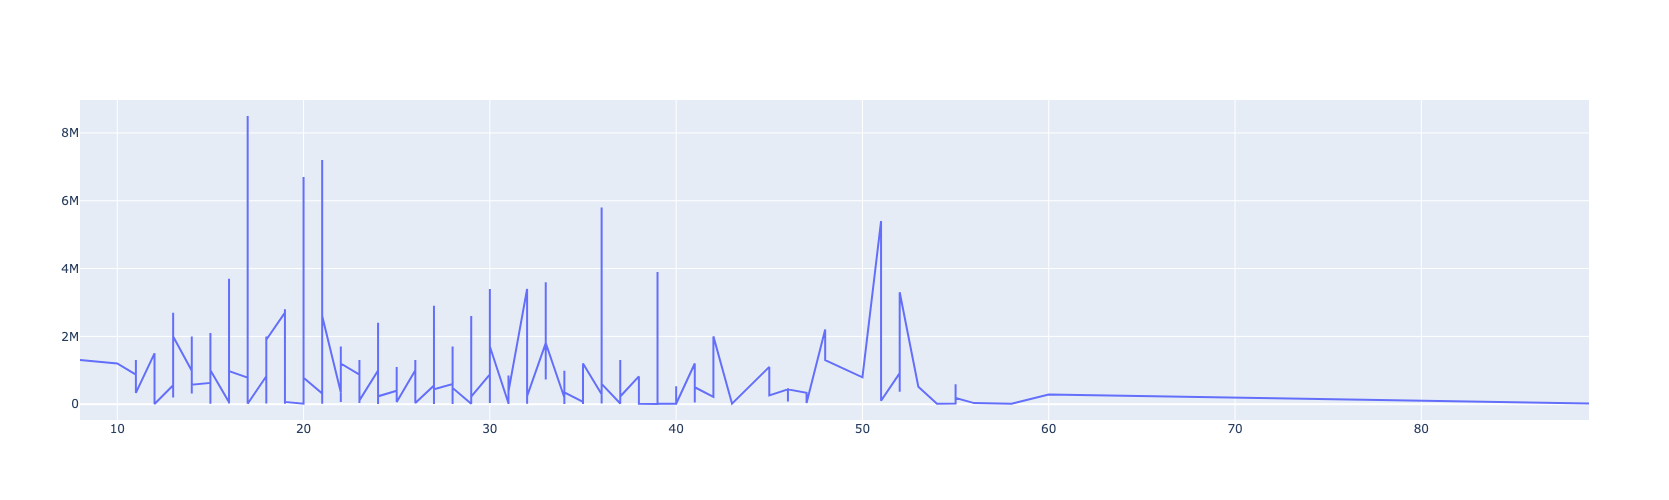

In [93]:
data = data[data[:,1].argsort()]
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=data[:,1],#(data[:,1]-min(data[:,1]))*100/(max(data[:,1])-min(data[:,1])),
        y=data[:,0],
    ))
fig.update_layout(height=500)
fig.show()

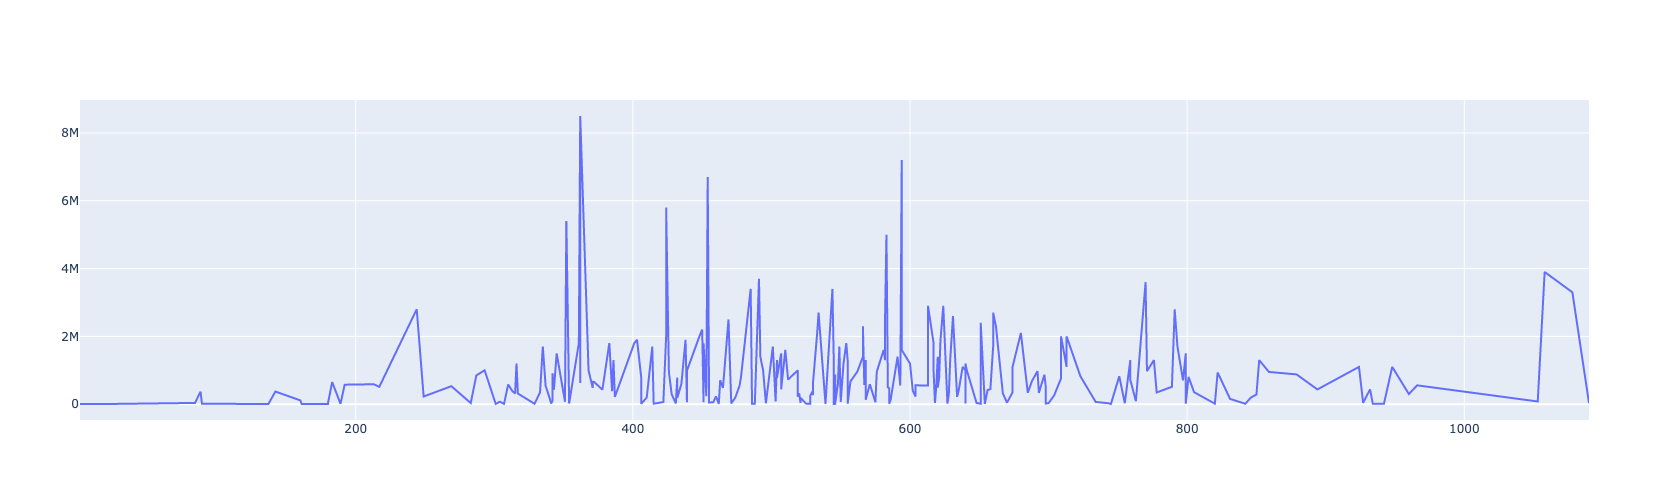

In [94]:
data = data[data[:,2].argsort()]
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=data[:,2],#(data[:,2]-min(data[:,2]))*100/(max(data[:,2])-min(data[:,2])),
        y=data[:,0],
    ))
fig.update_layout(height=500)
fig.show()